# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

If Keras is not installed: `pip install keras` in your terminal.

## Loading the packages

In [2]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as pl

# ... import here the different keras libraries you need
# MLP
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
from keras.models import Sequential

# CNN
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dense, Dropout

import sklearn.metrics as me

%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [3]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
#features = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
#X_train =  x_train.reshape((x_train.shape[0],features))                     # change the shape towards (60000, 784)
#X_test = x_test.reshape((x_test.shape[0],features))                          # idem (10000, 784)
X_train = x_train.astype(np.float32,copy=False)                                 # change the type towards float32
X_test = x_test.astype(np.float32,copy=False)                                    # idem
X_train /= np.max(X_train)                                                                       # normalize the range to be between 0.0 and 1.0
X_test /=  np.max(X_test)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [4]:
n_classes = 10
Y_train = to_categorical(y_train, n_classes)                  # modify targets to 1-hot using np_utils.to_categorical()
Y_test = to_categorical(y_test, n_classes)                    # idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a Multi-Layer Perceptron in our case. We will train it using H neurons, through E epochs, using batches of size B. We can try with 300 neuros, 10 epochs and batches of 128 images. We will also need to tell Keras what is the size of our inputs, in our case a linearized vector of size D=784.

In [8]:
H = 300         # number of neurons
E = 15              # number of epochs
B = 128            # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

############### CNN #########################
modelCNN = Sequential()
#modelCNN.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
#modelCNN.add(Activation('relu'))
#modelCNN.add(MaxPooling2D(pool_size=(2,2)))
#modelCNN.add(Flatten())
#modelCNN.add(Dense(n_classes))
#modelCNN.add(Activation('softmax'))

modelCNN.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
modelCNN.add(Activation('relu'))
modelCNN.add(Conv2D(32,(3,3)))
modelCNN.add(Activation('relu'))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.25))

modelCNN.add(Conv2D(64,(3,3), padding='same'))
modelCNN.add(Activation('relu'))
modelCNN.add(Conv2D(64,(3, 3)))
modelCNN.add(Activation('relu'))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.25))

modelCNN.add(Flatten())
modelCNN.add(Dense(512))
modelCNN.add(Activation('relu'))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(n_classes))
modelCNN.add(Activation('softmax'))

############### MLP #########################
#modelMLP = Sequential()
#modelMLP.add(Dense(H,input_dim=D,kernel_initializer='uniform',activation='relu'))
#modelMLP.add(Dropout(0.2))
#modelMLP.add(Dense(100,input_dim=D,kernel_initializer='uniform',activation='relu'))
#modelMLP.add(Dense(n_classes,kernel_initializer='uniform',activation='sigmoid'))

# ... print model infomration with summary() method
print(modelCNN.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        18496     
__________

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [ ]:
# ... compile the model with a crossentropy loss, rmsprop optimizer and defining metrics to be stored as history of the training
modelCNN.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# ... call the training with the fit() function giving the tensors as inputs, defining batch size, number of epochs and validation data
history = modelCNN.fit(X_train,Y_train,batch_size=B,epochs=E,verbose=1,validation_data=(X_test,Y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
14464/50000 [=======>......................] - ETA: 3:17 - loss: 2.1107 - acc: 0.2363

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


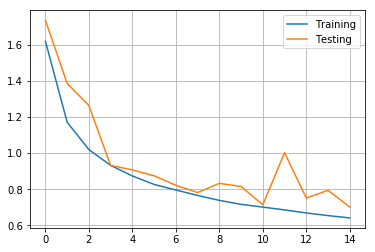

In [65]:
print(history.history.keys())
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [66]:
loss_test, metric_test = modelCNN.evaluate(X_test,Y_test,batch_size=B)
loss_train, metric_train = modelCNN.evaluate(X_train,Y_train,batch_size=B)
#print('Test loss:', loss_test)
print('Train accuracy:', metric_train)
#print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

50000/50000 [==============================] - 68s 1ms/step
Train accuracy: 0.825060000038147
Test accuracy: 0.7625


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [20]:
pred = modelCNN.predict_classes(X_test, verbose=1)
me.confusion_matrix(y_test, pred)

10000/10000 [==============================] - 4s 429us/step


array([[743,  17,  53,  31,   8,   6,  20,   6,  60,  56],
       [ 47, 736,  10,  11,   0,   7,  13,   7,  36, 133],
       [ 95,   9, 449,  98,  55,  91, 126,  45,  13,  19],
       [ 24,  14,  58, 527,  33, 177, 103,  30,  14,  20],
       [ 39,   2, 101, 120, 420,  62, 145,  91,  10,  10],
       [ 23,   6,  56, 220,  14, 565,  47,  51,   8,  10],
       [ 10,   3,  38,  73,  10,  17, 834,   4,   3,   8],
       [ 27,   3,  35,  66,  30,  82,  21, 712,   2,  22],
       [133,  58,   8,  26,   2,  10,  17,   3, 695,  48],
       [ 52,  81,  11,  20,   3,   9,   9,  26,  22, 767]])